# Mini Project

### 002 - The Distribution and Analysis of Existing Care sites (healthcare) in Spain: Case study of Castellon province.

### 1.0. Introduction:

#### 1.1. Project Summary:

In [289]:
%matplotlib inline

# Imports all the needed python libraries
import esda
import folium  # for interractive display of the study area
import geopandas as gpd # for adding and using geospatial features in a pandas dataframe
import osmnx as ox # for osm data access
import pandas as pd
import matplotlib.pyplot as plt # for visualization and plottings.
import matplotlib.image as mpimg # for display of images.
import networkx as nx
import numpy as np # for array management
from shapely.geometry import Point

# This help to ignore all depreciation warnings in the code
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


<div style='text-align: justify'>
This project analyzed the distribution and accessibility of existing care centres in Castellon de la Plana, Spain using OpenStreetMap OSM Data and Python programming. Based on the data analysis on the OSM There are a total of eighty-nine care centres in the province of Castellon, Spain.
    
    
<br>
</div>

#### 1.1.1. Aim and Objective:
<br>
<div style="text-align: justify">
<b>Aim:</b>
To develop a methodology for mapping the supply of care sites (healthcare centers) in Castellon de la plana, Spain using Python programming.

<b>Objective:</b>
- To analyze the distribution and accessibility of existing care sites (healthcare) using spatial data from OpenStreeMap (OSM).
</div>

##### 1.1.2. Data, Software, and libraries:
###### Data -
- OSM Data
- Administrative boundary (Geojson)

###### Software and Programming language -
- Python 3.12.4
- Anaconda 2.5.2
- Jupyter notebook 6.5.7

###### Libraries and Dependencies -
- esda 2.5.1
- geopandas 0.14.4
- ipython 8.25.0
- ipykernel 6.29.4 --> 6.28.0
- jupyter_client 7.4.9 --> 8.6.2 (pypi) and 7.1.2 (pyhd...)
- matplotlib 3.8.4
- networkx 3.3 --> 3.2.1
- notebook 6.5.7 
- numpy 2.0.0 --> 1.26.4
- OSMnx 1.9.3
- pandas 2.2.2
- pip 24.0
- pysal 24.1 (esda, weights)
- python 3.12.4
- scipy 1.13.1
- shapely 2.0.4
- splot 1.1.5.post1

#### 1.2. Justification:
##### 1.2.1. Area of Interest (AOI)

<div style="text-align: justify;">
As summer 🌇 is here, with large number of tourist🗺️🧳✈️🚇 approaching the province of castellon🏙️, usually for the very first time, it is important to understand and better analyze the distribution and accessibility of Care centres (healthcare) within the province for easy navigation by tourist🚝🧳 and better decision-making for city planners👷👷🏻‍♀️🏻📐🗺️📍. 
</div>

In [290]:
# Displays the map of Castellon de la plana, Spain
# latitude (39.9860347) and longitude (-0.0377354) of Castellon de la plana
city_center = [39.9860347,-0.0377354]
city_boundary = r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\geo_files\georef-spain-provincia.geojson"
name = 'Castellon de la Plana'

# creates a centered map around the capital city (Castellon de la plana)
castellon_map = folium.Map(location=city_center,zoom_start=12)

# adds the province (castellon) boundary to the map.
folium.GeoJson(city_boundary,name=name,style_function=lambda x:{
    'fillColor': 'grey',
    'color': 'black',
    'weight': 2,
    'fillOpacity': 0.5,
}).add_to(castellon_map)
castellon_map


##### 1.2.2. About the Province
<br>
<div style="text-align: justify">    
Castellon🏙️🌊🏖️, is a vibrant gem on Spain's eastern coast which invites tourists to experience its <i>blend of rich history 🏰</i>, <i>stunning Mediterranean beaches 🏖️</i>, and <i>lively cultural scene🎉</i>. It was founded in 1251 as a picturesque city which offers the perfect mix of traditon and modernity. It offers attractions like the iconic  <b>El Fadrí bell tower🗼</b>, <b>the lush Parque Ribalta🌳</b> , and the fascinating <b>Planetarium</b> at its capital city (Castellon de la plana). See beautiful images of the city below:
</div>
<br>

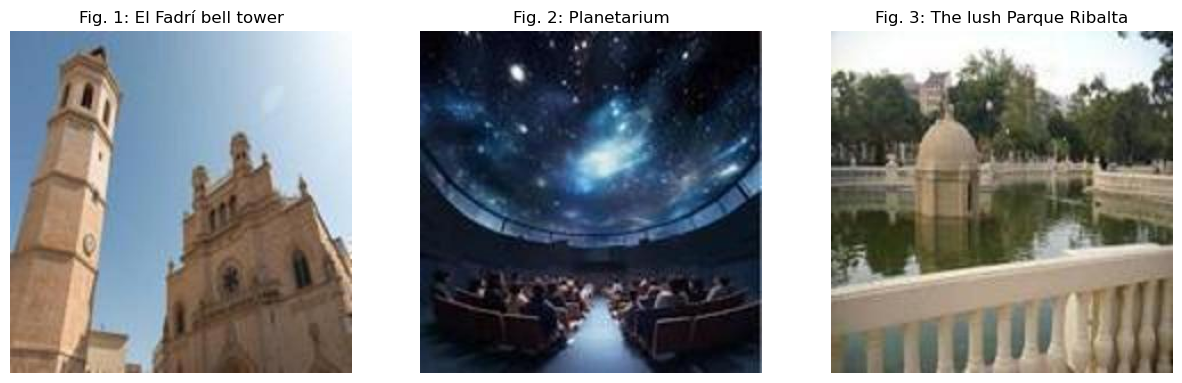

In [291]:
# Path to your image file
image_paths = [(r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\images\img1_El-Fadri.jpg",
            "Fig. 1: El Fadrí bell tower"), 
           (r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\images\img2_Planetarium.jpeg",
           "Fig. 2: Planetarium"),
           (r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\images\img3_lush_Parque_ribalta.jpeg",
           "Fig. 3: The lush Parque Ribalta")]

# Creates subplots
num_images = len(image_paths) # Gets the number of images to be used for the "ncol" parameter in the subplot.
fig, axes = plt.subplots(1, num_images, figsize=(15,5))

for ax, (path, caption) in zip(axes, image_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Hides the axes
    ax.set_title(caption)

<br>

In [292]:
# # Set paths to the image files
# image_paths = [(r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\images\img1_El-Fadri.jpg",
#             "Fig. 1: El Fadrí bell tower"), 
#            (r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\images\img2_Planetarium.jpeg",
#            "Fig. 2: Planetarium"),
#            (r"C:\Users\msi\OneDrive\Projects\Data-Pop_Alliance_Projects\Project_1\images\img3_lush_Parque_ribalta.jpeg",
#            "Fig. 3: The lush Parque Ribalta")]

# # Loops through the image_paths to display and label each images.
# for path, caption in image_paths:
#     img = mpimg.imread(path)
#     plt.imshow(img)
#     plt.axis('off')  # Hides the axes
#     plt.title(caption)
#     plt.show() 


##### 1.2.3. Data Source

<div style="text-align: justify">
The data used to analyse the availability and distribution of care sites in this project is obtained from the <b>OpenStreetMap (OSM) </b><a href="https://www.openstreetmap.org/#map=6/40.413/-3.801"><b>data<b></a> repository and <a href="https://public.opendatasoft.com/explore/dataset/georef-spain-provincia/map/?disjunctive.acom_code&disjunctive.acom_name&disjunctive.prov_code&disjunctive.prov_name&refine.prov_name=Castell%C3%B3&location=9,40.25379,-0.07799&basemap=jawg.light"><b>opendatasoft</b></a>. The administrative boundary (geojson) was downloaded from opendatasoft. OSM data was chosen based on its comprehensive and crowd-sourced geographic information while open. OSM offers openly available and regularly updated data contributed by a worldwide community of users, in contrast to proprietary maps. This extensive dataset encompasses not only fundamental elements of infrastructure, such as roads and buildings, but also vital information pertaining to the accessibility of healthcare, such as public transportation routes, pedestrian pathways, and notable landmarks. Moreover, it facilitates a thorough examination of the closeness between healthcare establishments and marginalised populations, thus assisting in identifying discrepancies in availability and developing effective distribution strategies. 
<br><br>  
Moreover, its transparent and inclusive characteristics foster a culture of openness, facilitate collaborative improvements, and empower the creation of customised applications that meet specific healthcare needs and local conditions. This attribute makes it an outstanding tool for guaranteeing equitable and unbiased access to healthcare services.
    
</div>

<!-- <br> -->

### 2.0. Data, Methods, Analysis and Results

#### 2.1. Data Collection:

In [293]:
# Collects  data from OSM
city = "Castellón, Valencian Community, Spain"
Graph = ox.graph_from_place(city, network_type='drive')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(Graph) # Creates nodes and edges (streets or ways) from the province.

In [294]:
# Checks for the Projection of the dataset
gdf_edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


#### 2.2. Data Cleaning:
The data cleaning basically involves the removal of NaN values and dropping features that are NOT needed in the dataframe.

In [295]:
# Checks for the columns in the datasets
gdf_edges.columns

Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'reversed',
       'length', 'bridge', 'geometry', 'maxspeed', 'tunnel', 'junction',
       'width', 'access', 'service'],
      dtype='object')

In [296]:
# Visualises the Dataframe
gdf_edges.head()



# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

osmid  \
u         v          key                                                      
241150033 2232639218 0                                             22475994   
          1717088083 0    [609233166, 609233169, 234123447, 234123448, 2...   
          2232638911 0                                            213594414   
241152136 241152165  0                                            190076918   
          247105272  0                                            190076918   

                          oneway lanes    ref                  name  \
u         v          key                                              
241150033 2232639218 0     False     2  CV-20  Carretera Montanejos   
          1717088083 0     False     2  CV-20  Carretera Montanejos   
          2232638911 0     False   NaN    NaN       Calle La Solana   
241152136 241152165  0     False     2  CV-20    Carretera de Tales   
          247105272  0     False     2  CV-20    Carretera de Tales   

                              highway reversed    length bridge  \
u         v          key                                          
241150033 2232639218 0        primary     True    33.717    NaN   
          1717088083 0        primary    False  4581.187    yes   
          2232638911 0    residential    False   105.323    NaN   
241152136 241152165  0        primary    False   190.993    NaN   
          247105272  0        primary     True   183.859    NaN   

                                                                   geometry  \
u         v          key                                                      
241150033 2232639218 0    LINESTRING (-0.48357 40.07110, -0.48324 40.07126)   
          1717088083 0    LINESTRING (-0.48357 40.07110, -0.48368 40.071...   
          2232638911 0    LINESTRING (-0.48357 40.07110, -0.48339 40.070...   
241152136 241152165  0    LINESTRING (-0.52338 40.06888, -0.52344 40.068...   
          247105272  0    LINESTRING (-0.52338 40.06888, -0.52333 40.068...   

                         maxspeed tunnel junction width access service  
u         v          key                                                
241150033 2232639218 0        NaN    NaN      NaN   NaN    NaN     NaN  
          1717088083 0        NaN    NaN      NaN   NaN    NaN     NaN  
          2232638911 0        NaN    NaN      NaN   NaN    NaN     NaN  
241152136 241152165  0        NaN    NaN      NaN   NaN    NaN     NaN  
          247105272  0        NaN    NaN      NaN   NaN    NaN     NaN

##### 2.2.1. How relevant is some of the features within the data to the project analysis?

In [297]:
# Determines how many rows are in the table.
rowcount = gdf_edges.shape[0]
print(f"There are a total of {rowcount} records in the dataframe \n")

# Lists features to check for null-values.
features = ["bridge","maxspeed","tunnel", "junction", "width", "access", "service"]

# Loops through the list of features to check for existing NaN values.
for feature in features:
    null_records = gdf_edges.loc[gdf_edges[feature].isnull()].shape[0]
    percentage_null_records = round((null_records/rowcount)*100,2)
    print("There were "+str(null_records)+f" records with null values in the {feature} column. This amounts to "+str(percentage_null_records)+"% of the available data.")

There are a total of 86787 records in the dataframe 

There were 85109 records with null values in the bridge column. This amounts to 98.07% of the available data.
There were 79644 records with null values in the maxspeed column. This amounts to 91.77% of the available data.
There were 86472 records with null values in the tunnel column. This amounts to 99.64% of the available data.
There were 81162 records with null values in the junction column. This amounts to 93.52% of the available data.
There were 86638 records with null values in the width column. This amounts to 99.83% of the available data.
There were 86638 records with null values in the access column. This amounts to 99.83% of the available data.
There were 86779 records with null values in the service column. This amounts to 99.99% of the available data.


In [298]:
# Drops irrelevant columns from the dataset.
gdf_edges = gdf_edges.drop(columns=features, errors='ignore')
gdf_edges.head()

osmid  \
u         v          key                                                      
241150033 2232639218 0                                             22475994   
          1717088083 0    [609233166, 609233169, 234123447, 234123448, 2...   
          2232638911 0                                            213594414   
241152136 241152165  0                                            190076918   
          247105272  0                                            190076918   

                          oneway lanes    ref                  name  \
u         v          key                                              
241150033 2232639218 0     False     2  CV-20  Carretera Montanejos   
          1717088083 0     False     2  CV-20  Carretera Montanejos   
          2232638911 0     False   NaN    NaN       Calle La Solana   
241152136 241152165  0     False     2  CV-20    Carretera de Tales   
          247105272  0     False     2  CV-20    Carretera de Tales   

                              highway reversed    length  \
u         v          key                                   
241150033 2232639218 0        primary     True    33.717   
          1717088083 0        primary    False  4581.187   
          2232638911 0    residential    False   105.323   
241152136 241152165  0        primary    False   190.993   
          247105272  0        primary     True   183.859   

                                                                   geometry  
u         v          key                                                     
241150033 2232639218 0    LINESTRING (-0.48357 40.07110, -0.48324 40.07126)  
          1717088083 0    LINESTRING (-0.48357 40.07110, -0.48368 40.071...  
          2232638911 0    LINESTRING (-0.48357 40.07110, -0.48339 40.070...  
241152136 241152165  0    LINESTRING (-0.52338 40.06888, -0.52344 40.068...  
          247105272  0    LINESTRING (-0.52338 40.06888, -0.52333 40.068...

In [299]:
gdf_edges.shape

(86787, 9)

In [300]:
gdf_nodes.head()

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
241150033,40.071101,-0.483574,3,NaN,NaN,POINT (-0.48357 40.07110)
241152136,40.068876,-0.523381,3,NaN,NaN,POINT (-0.52338 40.06888)
241152165,40.070173,-0.524809,3,NaN,NaN,POINT (-0.52481 40.07017)
241152214,40.071998,-0.526636,3,NaN,NaN,POINT (-0.52664 40.07200)
241152215,40.072181,-0.526772,3,NaN,NaN,POINT (-0.52677 40.07218)


In [301]:
gdf_nodes.shape

(39445, 6)

#### 2.3. Spatial Data Exploration:

##### 2.3.1. The Distribution of Care sites (healthcare) in Castellon, Spain.
To properly analyze the distribution of care sites (healthcare) in the province of Castelon, the following research questions will be answered:
- How many healthcare centres are in the province?
- What is the distribution of the centers in the province?
- How evenly distributed are the centers in the province?
- Where are the Hotspots, Coldspots and Outliers in the data?

##### A.) Conducting Exploratory Data Analysis (EDA)

In [302]:
# Extracts care centres from the OSM data
tags = {'amenity': ['hospital', 'clinic', 'doctors']}
care_centers = ox.features_from_place(city, tags) # Creates a geodataframe for the City using the set tags
print(care_centers.columns)


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Index(['amenity', 'healthcare', 'name', 'geometry', 'check_date',
       'source:date', 'description', 'healthcare:speciality', 'operator',
       'operator:type', 'operator:wikidata', 'name:ca', 'name:es', 'addr:city',
       'nodes', 'building', 'source', 'contact:phone', 'wikidata',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'wheelchair',
       'operator:wikipedia', 'opening_hours:signed', 'contact:email', 'phone',
       'website', 'emergency:phone', 'opening_hours', 'emergency',
       'social_facility', 'air_conditioning', 'email', 'level', 'mobile',
       'loc_name', 'loc_name:ca', 'loc_name:es', 'source:name', 'fax', 'note',
       'phone:mobile', 'wikipedia', 'old_name', 'designation', 'alt_name'],
      dtype='object')


In [303]:
care_centers.head()


amenity healthcare  \
element_type osmid                             
node         387357031    doctors     doctor   
             1129740720    clinic        NaN   
             2195459679    clinic        NaN   
             2377285410  hospital        NaN   
             3050806481   doctors     doctor   

                                                       name  \
element_type osmid                                            
node         387357031              Consultorio de Argelita   
             1129740720           Centro de Salud de Altura   
             2195459679               Centro de Salud Viver   
             2377285410  Hospital Complementario de Segorbe   
             3050806481      Consultorio auxiliar de Vallat   

                                          geometry  check_date source:date  \
element_type osmid                                                           
node         387357031   POINT (-0.35027 40.05388)         NaN         NaN   
             1129740720  POINT (-0.51117 39.85001)         NaN         NaN   
             2195459679  POINT (-0.60065 39.92103)         NaN         NaN   
             2377285410  POINT (-0.49176 39.84823)  2024-03-23         NaN   
             3050806481  POINT (-0.33732 40.03040)         NaN         NaN   

                                                               description  \
element_type osmid                                                           
node         387357031                                                 NaN   
             1129740720                                                NaN   
             2195459679                                                NaN   
             2377285410                                                NaN   
             3050806481  El consultorio depende del Centro de Salud de ...   

                        healthcare:speciality                operator  \
element_type osmid                                                      
node         387357031                    NaN                     NaN   
             1129740720                   NaN                     NaN   
             2195459679                   NaN                     NaN   
             2377285410                   NaN                     NaN   
             3050806481        general;nurses  Generalitat Valenciana   

                        operator:type  ... loc_name:ca loc_name:es  \
element_type osmid                     ...                           
node         387357031            NaN  ...         NaN         NaN   
             1129740720           NaN  ...         NaN         NaN   
             2195459679           NaN  ...         NaN         NaN   
             2377285410           NaN  ...         NaN         NaN   
             3050806481        public  ...         NaN         NaN   

                        source:name  fax note phone:mobile wikipedia old_name  \
element_type osmid                                                              
node         387357031          NaN  NaN  NaN          NaN       NaN      NaN   
             1129740720         NaN  NaN  NaN          NaN       NaN      NaN   
             2195459679         NaN  NaN  NaN          NaN       NaN      NaN   
             2377285410         NaN  NaN  NaN          NaN       NaN      NaN   
             3050806481         NaN  NaN  NaN          NaN       NaN      NaN   

                        designation alt_name  
element_type osmid                            
node         387357031          NaN      NaN  
             1129740720         NaN      NaN  
             2195459679         NaN      NaN  
             2377285410         NaN      NaN  
             3050806481         NaN      NaN  

[5 rows x 47 columns]

In [304]:
# Provides the total number of records in the dataset
care_centers.shape[0]

135

In [305]:
# Subsetting the data to remove irrelevant columns
care_centers = care_centers[["amenity","name","geometry"]]

# Sets coordinated reference system for the map.
care_centers = care_centers.to_crs(epsg=4326) 

# Shows the Care centre dataframe
care_centers.head()

amenity                                name  \
element_type osmid                                                      
node         387357031    doctors             Consultorio de Argelita   
             1129740720    clinic           Centro de Salud de Altura   
             2195459679    clinic               Centro de Salud Viver   
             2377285410  hospital  Hospital Complementario de Segorbe   
             3050806481   doctors      Consultorio auxiliar de Vallat   

                                          geometry  
element_type osmid                                  
node         387357031   POINT (-0.35027 40.05388)  
             1129740720  POINT (-0.51117 39.85001)  
             2195459679  POINT (-0.60065 39.92103)  
             2377285410  POINT (-0.49176 39.84823)  
             3050806481  POINT (-0.33732 40.03040)

In [306]:
# Checks to see if there are missing records (null values) in the dataset
care_centers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 135 entries, ('node', 387357031) to ('way', 460607457)
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   amenity   135 non-null    object  
 1   name      131 non-null    object  
 2   geometry  135 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 8.9+ KB


In [307]:
# Filters out ways (lines/polygons) and keep the node (points) geometry.
care_centers = care_centers[care_centers.geometry.type =="Point"]
care_centers.shape[0]

89

In [308]:
# Extract longitude (x) and latitude (y) from the point geometry into separate columns
care_centers['longitude'] = care_centers.geometry.x
care_centers['latitude'] = care_centers.geometry.y
care_centers.head()

amenity                                name  \
element_type osmid                                                      
node         387357031    doctors             Consultorio de Argelita   
             1129740720    clinic           Centro de Salud de Altura   
             2195459679    clinic               Centro de Salud Viver   
             2377285410  hospital  Hospital Complementario de Segorbe   
             3050806481   doctors      Consultorio auxiliar de Vallat   

                                          geometry  longitude   latitude  
element_type osmid                                                        
node         387357031   POINT (-0.35027 40.05388)  -0.350266  40.053880  
             1129740720  POINT (-0.51117 39.85001)  -0.511168  39.850014  
             2195459679  POINT (-0.60065 39.92103)  -0.600645  39.921034  
             2377285410  POINT (-0.49176 39.84823)  -0.491758  39.848227  
             3050806481  POINT (-0.33732 40.03040)  -0.337316  40.030398

In [309]:
# Groups Care centers by amenities
amenities = care_centers.groupby('amenity').count()
amenities.head()

,name,geometry,longitude,latitude
amenity,,,,
clinic,30,31,31,31
doctors,55,55,55,55
hospital,3,3,3,3


In [310]:
# Ploting Care centers by the type of amenity and
# grouping by 'amenity' and count occurrences
amenities_count = care_centers.groupby('amenity').size().reset_index(name='count')
amenities_count.head()

,amenity,count
0,clinic,31
1,doctors,55
2,hospital,3


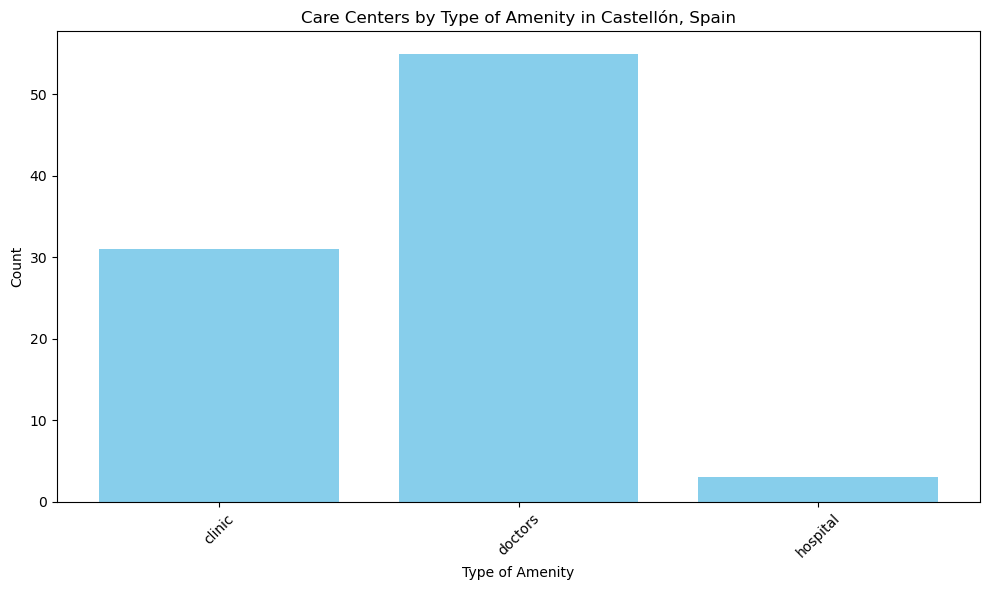

In [311]:
# Plots the bar chart
plt.figure(figsize=(10, 6))
plt.bar(amenities_count['amenity'], amenities_count['count'], color='skyblue')
plt.xlabel('Type of Amenity')
plt.ylabel('Count')
plt.title('Care Centers by Type of Amenity in Castellón, Spain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [313]:
# Checks for Skewness in the distribution
# import seaborn as sns
# sns.distplot (care_centers['value_zscore'],kde=True)
# plt.show()

##### B.) Conducting Exploratory Spatial Data Analysis (ESDA)
The exploratory spatial data analysis will be guided by the three research questions listed in section 2.3.1, which are:
1. How many healthcare centres are in the province?
2. What is the distribution of the centers in the province?
3. How evenly distributed are the centers in the province?
4. Where are the Hotspots, Coldspots and Outliers in the data?

###### 1. How many Care sites (healthcare) are in Castellon province?
According to the current data from OSM, there are **Eighty-nine (89) Care sites (healthcare centres)** in the province of Castellon, Spain.

In [314]:
care_centers_vis = care_centers['amenity'].value_counts()
total_amenity= care_centers_vis.sum()
print(f'There are a total of {total_amenity} Care sites (healthcare) in Castellon de la Plana.')

There are a total of 89 Care sites (healthcare) in Castellon de la Plana.


###### 2. What is the distribution of the care sites (healthcare) in the province?
The figure below shows the distribution of the care sites (healthcare) in Castellon.

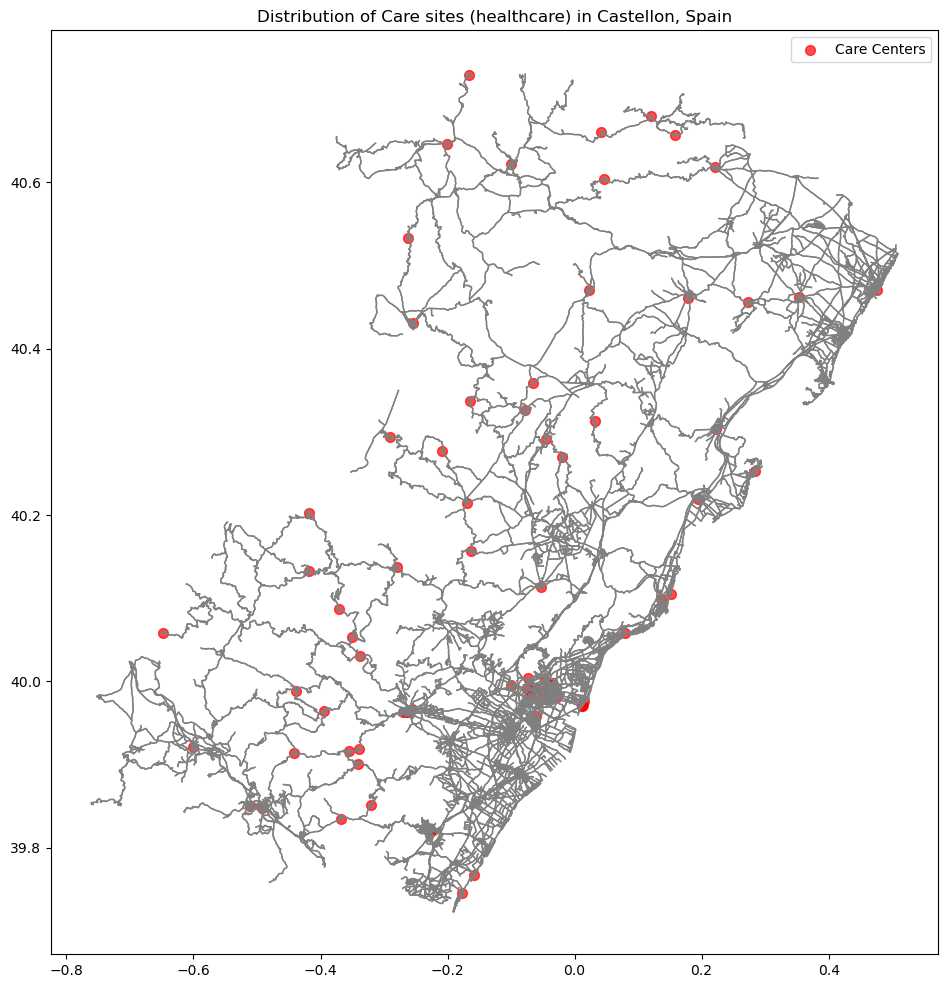

In [315]:
# Plots the distribution of Care sites (healthcare) in Castellon
fig, ax = plt.subplots(figsize=(12,12))
care_centers.plot(ax=ax, color='red',markersize=50,alpha=0.7,label="Care Centers")
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='gray')
plt.title('Distribution of Care sites (healthcare) in Castellon, Spain')
plt.legend()
plt.show()

<GeoAxes: >

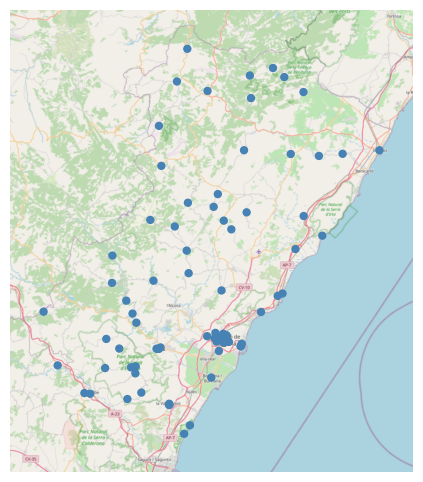

In [316]:
# Plots the distribution of Care sites (healthcare) in Castellon
import geoplot.crs as gcrs
import geoplot as gplt
ax = gplt.webmap(care_centers,projection=gcrs.WebMercator())
gplt.pointplot(care_centers, ax=ax)

###### 3. How evenly distributed are the Care sites (healthcare centres) in the province?
To evaluate the distribution of Care sites (healthcare centres) in the province, the <b>Moran's I</b> spatial statistics will be used.


In [317]:
# imports the folium library for showing the distribution of care centers in Castellon.
import folium

# Initializes a map centered around Castellon
map_castellon = folium.Map(location=[care_centers.geometry.y.mean(), care_centers.geometry.x.mean()], zoom_start=12)

# Adds the care sites to the map
for idx, row in care_centers.iterrows():
    folium.Marker([row.geometry.y, row.geometry.x], popup=row['name']).add_to(map_castellon)

# Displays the map
map_castellon


##### a.) Constructing a spatial hypothesis test
<br>
<div style="text-align: justify">
This section focus on testing the spatial structure of the dataset. Here, the null hypothesis (<b>H$_0$</b>) and alternative hypothesis (<b>H$_a$</b>) are formulated. See below:

- <b>H$_0$</b>(null hypothesis): The data is distributed randomly across space.
- <b>H$_a$</b> (alternative): The data exhibits a spatial structure and is not randomly distributed.
<br>
    
One hypothesis test we can perform is the <b>Moran's I</b>. This is a spatial autocorrelation technique that  will be used to assess whether the care sites (healthcare) are randomly distributed or clustered in space. 
<br>
    
<i>PS: Spatial Structure is the presence of a pattern within data across geographic space (David S. Jordan, 2023)</i>.
<br>
</div>

##### b.) About Moran's I
<br>
<div style="text-align: justify">
The Moran's I measures spatial autocorrelation of data based on <b><i>feature values</i></b> and <b><i>feature locations</i></b> (David S. Jordan, 2023). It provides a single value which helps indicate the overall spatial pattern. A positive Moran's value suggest that there is a <b><i>clustering</i></b>  while a negative value and values close to zero suggests <b><i>dispersion</i></b> and <b><i>randomness</i></b>, respectively. 
    
A negative spatial autocorrelation also suggest that low values are next to high values, or vice versa. A positive spatial autocorrelation occurs when observations within a neighborhood have similar values, either <i>high-high</i> values or <i>low-low</i> values (David S. Jordan, 2023).
<br>
<h6>c.) Moran's I Statistic Range and Interpretation</h6>
    
<b>(i.) Range:</b> Moran's I values range from -1 to +1. <br>
- <b>+1:</b> Indicates a perfect postive spatial autocorrelation with high values clustering together or  low values clustering together.
- <b>0:</b> Indicates that ther is NO spatial autocorrelation, and that the distribution of values is random.
- <b>-1:</b> Indicates a perfect negative spatial autocorrelation with high and low values perfectly dispered.
<br> 
    
<b>(ii.) Interpretation:</b>
1. <b>Positive Moran's I (> 0):</b>
    - Values close to +1 indicates strong positive spatial autocorrelation, meaning that similar values (either high or low) tend to be located near each other.
    - Example: If a region with high rate of cardiovascular disease is surrounded by other regions with high cardiovascular disease, the Moran's I statistic will be positive and closer to +1.
<br><br>
    
2. <b>Zero Moran's I (≈ 0):</b>
    - Values near zero indicates no spatial autocorrelation, suggesting that the spatial distribution of values is random.
    - Example: If high and low values are randomly distributed across the study area, the Moran's I will be close to zero.
<br><br>
    
3. <b>Negative Moran's I (< 0):</b>
    - Values close to -1 indicates strong negative spatial autocorrelation, meaning that dissimilar values (high values near low values) are adjacent.
    - Example: If regions with high rate of cardiovascular disease are surrounded by regions with low cardiovascular disease, the Moran's I statistic will be negative and closer to -1.
<br>
    
    
</div>

<div>
    <img src="C:/Users/msi/OneDrive/Projects/Data-Pop_Alliance_Projects/Project_1/images/Morans-I_formula.jpg" alt="Moran's I Formula"
</div>

###### d.) Computing the Moran's I Statistics
The steps taking to compute the Moran's I statistics include:
1. Importing the needed libraries.
2. Creating a numerical column (e.g. the variable to be tested for spatial autocorrelation) in the geodataframe.
3. Standardizing the values in the column using z-score statistics.
4. Ensuring the geodataframe is properly loaded and has the correct data type.
5. Checking for any potential issues in the data.
6. Creating unique IDs from the index and adding it as a new column in the geodataframe.
7. Verifying that the geometry column contains valid geometries.
8. Creating the KNN weights matrix.
9. Computing the Moran's I using the standardized numerical column (e.g. value_zscore).

In [318]:
# Displays the python in-built help fuction for Moran I statistics.
# help(pysal.explore.esda.Moran)

In [339]:
# Import additional libraries
from pysal.explore import esda # for exploratory spatial data analysis (esda)
from pysal.lib import weights # for computing the spatial weights
from scipy.stats import zscore
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from esda.moran import Moran_Local


In [320]:
# Create a numerical column in the GeoDataFrame for computing the Moran's I
care_centers["value"] = np.random.rand(len(care_centers))

# Standardize the 'value' column
care_centers['value_zscore'] = zscore(care_centers["value"])

# Create unique IDs from the index and adds it as a new column.
# care_centers['id'] = care_centers.index.map(str)

# Create unique IDs from the index 
care_centers.reset_index(inplace=True)

care_centers.head()

,element_type,osmid,amenity,name,geometry,longitude,latitude,value,value_zscore
0,node,387357031,doctors,Consultorio de Argelita,POINT (-0.35027 40.05388),-0.350266,40.053880,0.714225,0.478982
1,node,1129740720,clinic,Centro de Salud de Altura,POINT (-0.51117 39.85001),-0.511168,39.850014,0.621704,0.179001
2,node,2195459679,clinic,Centro de Salud Viver,POINT (-0.60065 39.92103),-0.600645,39.921034,0.901773,1.087071
3,node,2377285410,hospital,Hospital Complementario de Segorbe,POINT (-0.49176 39.84823),-0.491758,39.848227,0.916286,1.134129
4,node,3050806481,doctors,Consultorio auxiliar de Vallat,POINT (-0.33732 40.03040),-0.337316,40.030398,0.599458,0.106870


In [321]:
# Ensures the GeoDataFrame is properly loaded and contains the correct data types
print(care_centers.dtypes)

# Double-checks for any potential issues in the data
print("\n")
print(care_centers.geometry.is_valid)

element_type      object
osmid              int64
amenity           object
name              object
geometry        geometry
longitude        float64
latitude         float64
value            float64
value_zscore     float64
dtype: object


0     True
1     True
2     True
3     True
4     True
      ... 
84    True
85    True
86    True
87    True
88    True
Length: 89, dtype: bool


In [322]:
# Verify that the geometry column contains valid geometries.
print(care_centers.geometry.head())

# Attempt to create the KNN weights matrix.
try:
    weight = weights.KNN.from_dataframe(care_centers, geom_col="geometry")
    print("\n Spatial weights matrix created successfully!")
except TypeError as e:
    print(f"Error: {e}")
except Exception as E:
    print(f"An unexpected error occurred: {E}")

0    POINT (-0.35027 40.05388)
1    POINT (-0.51117 39.85001)
2    POINT (-0.60065 39.92103)
3    POINT (-0.49176 39.84823)
4    POINT (-0.33732 40.03040)
Name: geometry, dtype: geometry

 Spatial weights matrix created successfully!


C:\ProgramData\anaconda3\envs\ox\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


In [323]:
# Computes the Moran's I using the standardized numerical column
variable = care_centers["value_zscore"]
moran = esda.Moran(variable,weight)
moran_I = moran.I

# Computes the z-score and normal approximation p-value
p_value_norm = moran.p_norm
z_score = moran.z

# Computes the permutation test p-value
p_value = moran.p_sim

# # Function to print the moran-I result
# def moran_I_output():
#     if moran_I < 0:
#         output = "shows a negative spatial autocorrelation. As a result, the care sites can be described as dispersed rather than clustered."
#     elif p_value > 0.09: 
#         output = "shows a spatial autocorrelation that is very close to zero. This suggests that there is a clustering in the distribution"
#     elif p_value > 0: 
#         output = "shows a positive spatial autocorrelation. This suggests that there is a clustering in the distribution"
#     return output

# Function to print the p-value results
def p_value_output():
    if p_value > 0.05:
        output = "which is high (typically above 0.05)"
    elif p_value < 0.05: 
        output = "which is low (typically below 0.05)"
    return output

# Function to print the hypothesis-decision from the p-value result
def p_value_decision():
    if p_value > 0.05:
        decision = "reject the null hypothesis (H$_0$)"
    elif p_value < 0.05: 
        decision = "accept the null hypothesis (H$_0$)"
    return decision

# Function to print the conclusion from the test of hypothesis
def p_value_conclusion():
    if p_value > 0.05:
        conclusion = "The data exhibits a spatial structure and is NOT randomly distributed!"
    elif p_value < 0.05: 
        conclusion = "The data does NOT exhibit any spatial structure and is randomly distributed!"
    return conclusion

print(f"The Moran\'s I: {moran_I}")
print(f"The p-value: {p_value}")
print(f"The p-value_norm: {p_value_norm}\n")

# print(p_value_output()) # Test the function
# print(p_value_decision()) # Test the function

The Moran's I: -0.09416803379051775
The p-value: 0.196
The p-value_norm: 0.385623317750858



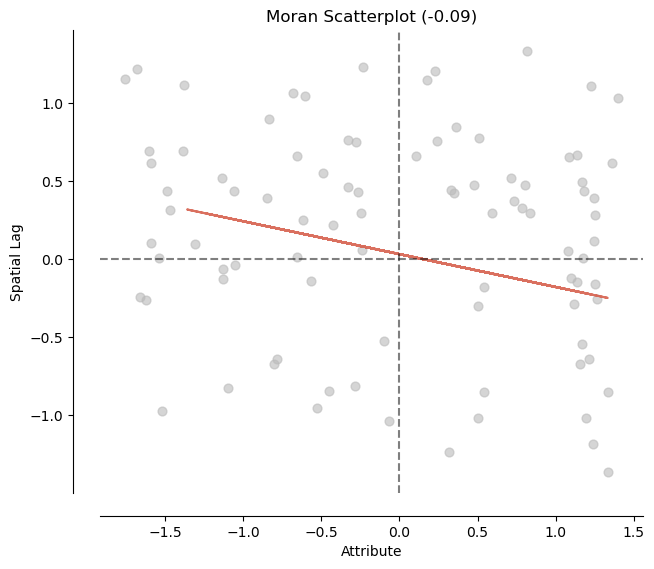

In [324]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

C:\ProgramData\anaconda3\envs\ox\Lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


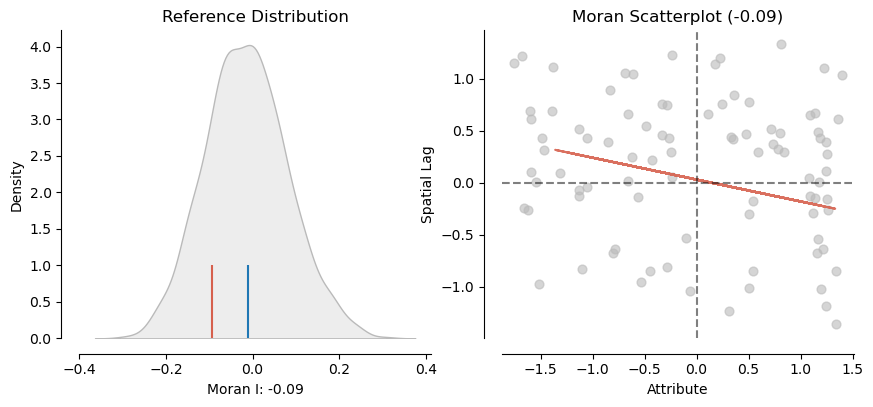

In [325]:
# A joint plot of the Reference Distribution and the Moran Scatterplot
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

###### 4. Where are the Hotspots, Coldspots and Outliers in the data?
<b>4a (i) The Visualizatioin of the Moran's Local Scatterplot:</b> 

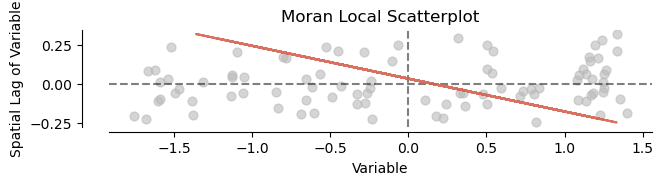

In [327]:
# calculate Moran_Local autocorrellation
y= care_centers['value_zscore'].values
moran_loc = Moran_Local(y, weight)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Variable')
ax.set_ylabel('Spatial Lag of Variable')
plt.show()

<b>4a (ii) The Moran's Local Scatterplot with p-value of 0.05:</b> 

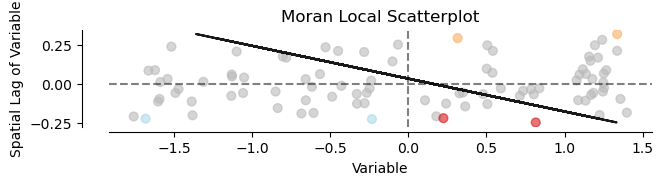

In [328]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Variable')
ax.set_ylabel('Spatial Lag of Variable')
plt.show()

<div style='text-aligh: justify'>We can distinguish the specific type of local spatial autocorrelation in High-High, Low-Low, High-Low, Low-High. Where the upper right quadrant displays HH, the lower left, LL, the upper left LH and the lower left HL.
<br>
<br>
These types of local spatial autocorrelation describe similarities or dissimilarities between a specific polygon with its neighboring polygons. The upper left quadrant for example indicates that polygons with low values are surrounded by polygons with high values (LH). The lower right quadrant shows polygons with high values surrounded by neighbors with low values (HL). This indicates an association of dissimilar values.
    
</div>

###### 4b. Visualization of areas found to be significant on the map:

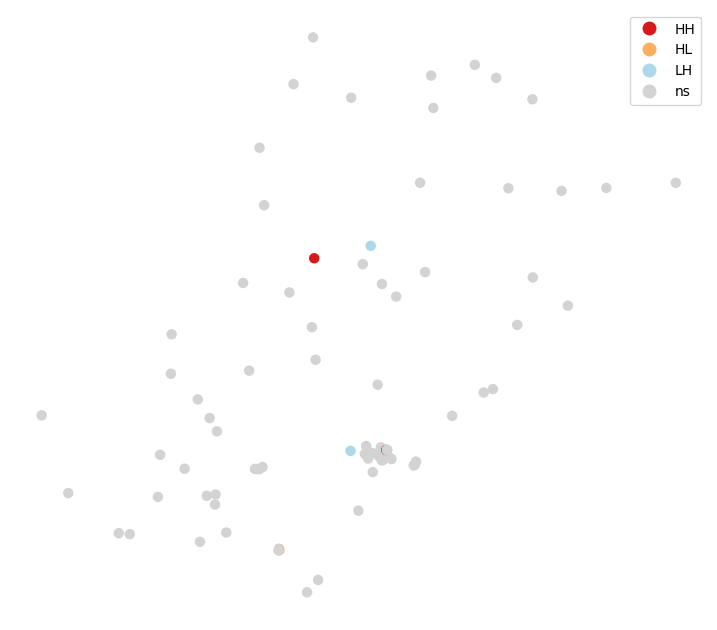

In [340]:
# Visualises the areas found to be significant using lisa_cluster module of splot library.
lisa_cluster(moran_loc, care_centers, p=0.05, figsize = (9,9))
plt.show()

##### 4d. Combined visualizations of all the plots:

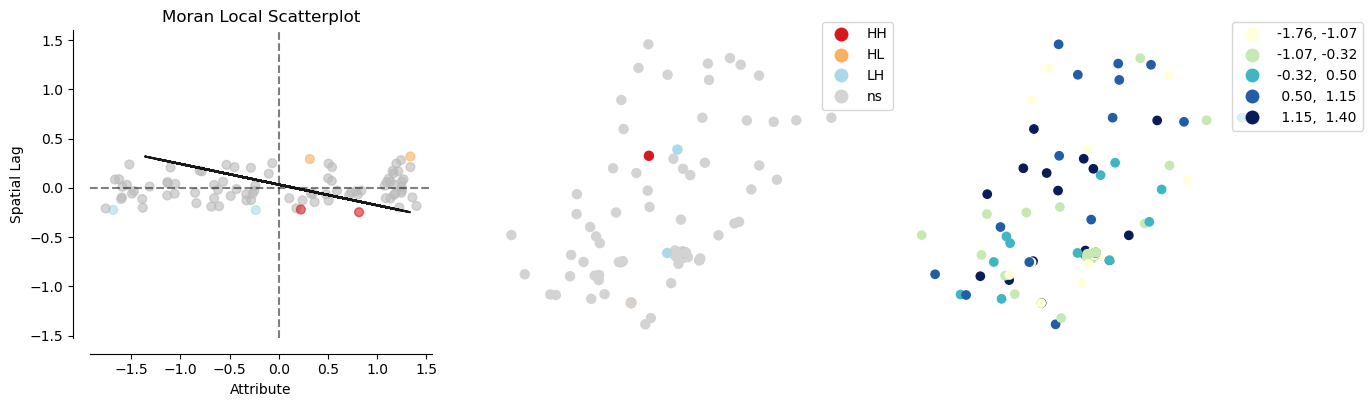

In [341]:
# Plots local autocorrelation by Visualizes all the plots 
# The plots include; Moran Local Scatterplot, LISA cluster map and the choropleth map
plot_local_autocorrelation(moran_loc, care_centers, 'value_zscore')
plt.show()

<br>

##### 2.3.2. The Accessibility of Care sites (healthcare) in Castellon, Spain.
To properly evaluate the accessibility of care sites (healthcare) in the province of Castelon, the research question below will be answered:
1. How accessible are the healthcare centres in the province?
2. What is the average driving distance to the closest healthcare centre in the province?
3. Where are the Hotspots, Coldspots and Outliers?

###### 1. How accessible are the healthcare centres in the province?

In [331]:
# Creates an help function to calculate the shortest path distance to the closest care site (healthcare) in the area
def calculate_shortest_path_distance (Graph,point):
    nearest_node= ox.distance.nearest_nodes(Graph,point.x,point.y)
    length = nx.shortest_path_length(Graph, source=nearest_node, 
                                     weight= weight)
    return length

# Converts care sites (healthcare) to a list of points
care_centers_points = [Point(xy) for xy in zip(care_centers.geometry.x,
                                               care_centers.geometry.y)]

# Calculate shortest path distances for each care site (healthcare).
distances = []
for point in care_centers_points:
    lengths = calculate_shortest_path_distance(Graph, point)
    distances.append(lengths)

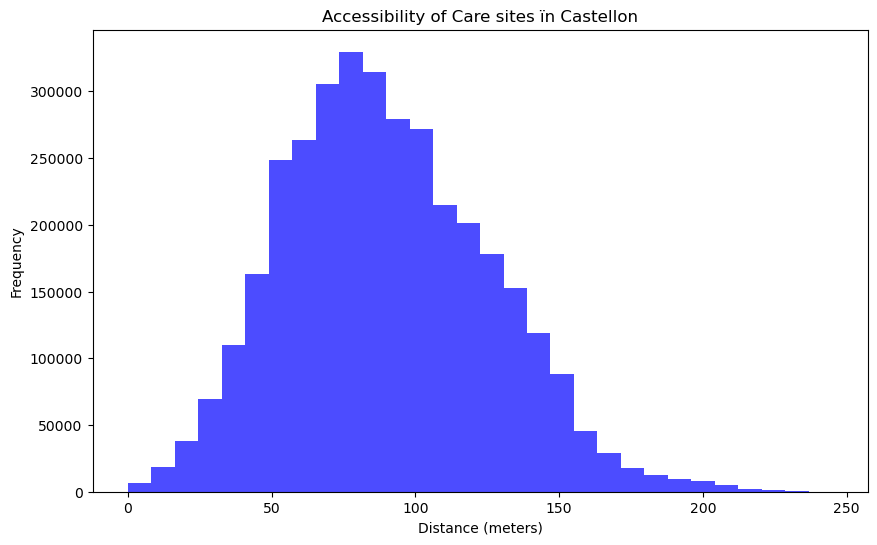

In [332]:
# Visualizes the accessibility of each care site
# Plots the histogram of distances
plt.figure(figsize=(10, 6))
plt.hist(distance_df.stack(), bins=30, color='blue', alpha=0.7)
plt.title('Accessibility of Care sites ïn Castellon')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

###### 2. What is the average driving distance to the closest healthcare centre in the province?

In [333]:
# Aggregates and analyzes the distance data
distance_df = pd.DataFrame(distances)
distance_mean = distance_df.mean()
print("The Average Driving Distance of the care sites (healthcare):")
print(distance_mean)

# Summary statistics of the accesibility of care sites (healthcare) in Castellon
distance_stats = distance_df.describe()
print("\n Accessibility Analysis Summary:")
print(distance_stats)

The Average Driving Distance of the care sites (healthcare):
387356978     102.876404
387357029     103.168539
387356376     101.898876
387356984     103.876404
387356375     103.382022
                 ...    
2121835601      0.000000
2121835699      1.000000
2121835700      2.000000
672759387       3.000000
2121835732      3.000000
Length: 39344, dtype: float64

 Accessibility Analysis Summary:
       387356978   387357029   387356376   387356984   387356375   387356987   \
count   89.000000   89.000000   89.000000   89.000000   89.000000   89.000000   
mean   102.876404  103.168539  101.898876  103.876404  103.382022  103.797753   
std     36.021086   35.951431   35.956743   36.021086   35.928751   35.959630   
min      0.000000    1.000000    1.000000    1.000000    2.000000    2.000000   
25%     82.000000   83.000000   81.000000   83.000000   84.000000   84.000000   
50%    114.000000  115.000000  113.000000  115.000000  116.000000  116.000000   
75%    128.000000  127.000000  12

In [334]:
# # Perform some additional statistical measures to better interpret the care center assessibility
# percentiles = distance_df.quantile([0.25, 0.5, 0.75])
# variance = distance_df.var()
# std_dev = distance_df.std()
# IQR = distance_df.quantile(0.75) - distance_df.quantile(0.25)
# CV = std_dev / distance_df.mean()

# print("\nPercentiles:\n", percentiles)
# print("\nVariance:\n", variance)
# print("\nStandard Deviation:\n", std_dev)
# print("\nInterquartile Range (IQR):\n", IQR)
# print("\nCoefficient of Variation (CV):\n", CV)


In [335]:
# # Box plot visualization
# plt.figure(figsize=(10, 6))
# plt.boxplot(distance_df.stack(), vert=False)
# plt.title('Box Plot of Accessibility of Care Sites in Castellon')
# plt.xlabel('Distance (meters)')
# plt.show()



### 3.0. Discussion and Conclusion
##### 3.1. Discussion:

In [337]:
# Imports the 'HTML' and 'display' modules from the IPython library
from IPython.display import HTML, display

# Creates an HTML string with the variable's value
html_text = f"""
<br>
<div style="text-align: justify">
The <b>Moran's I value</b> ({round(moran_I,4)}) shows a negative spatial autocorrelation. 
As a result, the care sites can be described as dispersed rather than clustered. 
The <b>p-value</b> of {round(p_value,4)} {p_value_output()}, 
also suggest that we <b>{p_value_decision()}</b> of spatial randomness. 
<br>
<h5>3.2. Conclusion:</h5>
<br>
The data exhibits a spatial structure and is NOT randomly distributed!
</div>
"""

# Display the HTML string
display(HTML(html_text))

### 4.0. References and Attribution

- [Overpass Turbo](): A web-based interface for querying OSM data using the Overpass API.
- [Emojipedia](https://emojipedia.org/): A wikipedia of emoticons and emojis. 
- [Opendatasoft](https://www.ign.es/resources/licencia/Condiciones_licenciaUso_IGN.pdf): A public data catalogue of geospatial datasets published by opendatasoft data team available in different formats. 
- [OSMnx](https://osmnx.readthedocs.io/en/stable/): Documentation for the OSMnx library. 
- [Matplotlib](https://matplotlib.org/stable/plot_types/index.html): Documentation for the plot types. 
- [PySal](https://pysal.org/notebooks/intro): Documentation for the Python Spatial Analysis library. 
- [OpenStreetMap](https://www.openstreetmap.org/#map=6/40.413/-3.801): OpenStreetMap Data Archive.
- [Stack Overflow](https://stackoverflow.com/): Platform for programming guide and support.
- [GIS stack exchange](https://gis.stackexchange.com/questions/420265/interpretation-of-global-moran-i-values-using-pysal): Platform for seeking guides and GIS support.





